In [ ]:
import sys 
sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding')
from calc_dec_wTask_CR import calc_dec_wTask_CR
gat, score, diagonal = calc_dec_wTask_CR('/neurospin/meg/meg_tmp/Calculation_Pedro_2014',['op1', 'op1'],'s01','class')

In [22]:
import sys 
sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding')
from fldtrp2mne_calc import fldtrp2mne_calc
import numpy as np
import mne
import pandas as pd

In [2]:
data_path = '/neurospin/meg/meg_tmp/Calculation_Pedro_2014/data/mat'
Subject = 's01'

In [3]:
fname_calc = data_path + '/' + Subject + '_calc.mat'
epoch_calc,info_calc = fldtrp2mne_calc(fname_calc, 'data', 'calc')


In [4]:
idx_delay = info_calc['delay'] == 1
idx_nodelay = info_calc['delay'] == 0
time_calc_crop = np.arange(-0.1,0.8004,0.004)



In [5]:
epoch_calc_delay = epoch_calc[idx_delay]
epoch_calc_delay.crop(3.5,4.4)
epoch_calc_delay.times = time_calc_crop


In [6]:
epoch_calc_nodelay = epoch_calc[idx_nodelay]
epoch_calc_nodelay.crop(3.1,4)
epoch_calc_nodelay.times = time_calc_crop

In [27]:
epoch_calc_resplock = mne.epochs.concatenate_epochs([epoch_calc_delay,epoch_calc_nodelay])

362 matching events found
No baseline correction applied
0 bad epochs dropped


In [12]:
epoch_calc_res

<Epochs  |  n_events : 362 (all good), tmin : -0.1 (s), tmax : 0.8 (s), baseline : None>

In [9]:
baseline = (-0.5, -0.05) #time for the baseline period
epoch_calc.apply_baseline(baseline)
evoked_baseline = epoch_calc.average()
evoked_baseline.plot()

Applying baseline correction (mode: mean)


Populating the interactive namespace from numpy and matplotlib


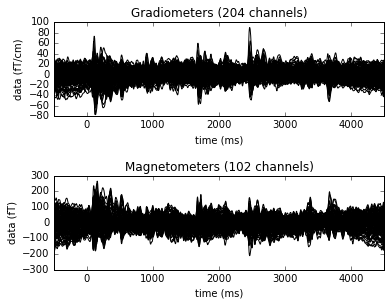

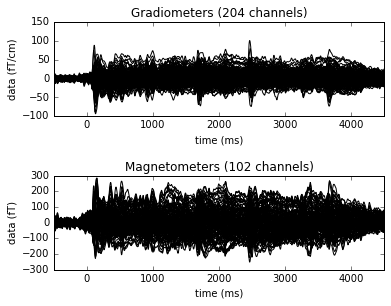

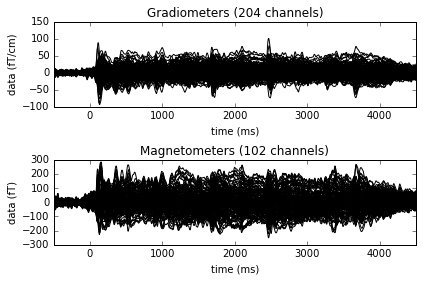

In [11]:
%pylab inline 
evoked.plot()
evoked_baseline.plot()

In [17]:
info_calc_delay = info_calc[info_calc['delay'] == 1]
info_calc_nodelay = info_calc[info_calc['delay'] == 0]


In [23]:
info_calc_resplock = pd.concat([info_calc_delay, info_calc_nodelay])

NameError: name 'epoch_calc_resplock' is not defined

In [28]:
X_train = epoch_calc_resplock[(info_calc_resplock['preResult'] >= 3) & (info_calc_resplock['preResult'] <= 6)]

In [30]:
y_train = np.array(info_calc_resplock['preResult'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train

In [33]:
y_train


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,
        5.,  1.,  1.,  6.,  6.,  1.,  1.,  1.,  1.,  7.,  1.,  1.,  1.,
        3.,  1.,  7.,  5.,  1.,  2.,  1.,  4.,  1.,  4.,  1.,  5.,  9.,
        1.,  6.,  1.,  6.,  1.,  1.,  1.,  1.,  1.,  0.,  8.,  1.,  1.,
        1.,  1.,  5.,  1.,  5.,  3.,  1.,  1.,  7.,  1.,  1.,  4.,  1.,
        1.,  1.,  1.,  1.,  4.,  7.,  3.,  1.,  0.,  1.,  1.,  7.,  1.,
        1.,  1.,  1.,  8.,  6.,  1.,  1.,  1.,  1.,  1.,  6.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  5.,  1.,  1.,  1.,  4.,  5.,  1.,  1.,
        1.,  1.,  1.,  6.,  2.,  5.,  4.,  1.,  6.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,
        1.,  4.,  1.,  4.,  1.,  1.,  1.,  5.,  1.,  1.,  1.,  4.,  1.,
        5.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  5.,  1.,  1.,  1.,  5.,
        1.,  1.,  1.,  1.,  6.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,
        1.,  3.,  1.,  8.,  1.,  1.,  1.,  4.,  1.,  1.,  7.,  3

In [ ]:
b

In [ ]:
%pylab qt
a.plot()


In [ ]:
c = mne.epochs.concatenate_epochs([a,b])

In [ ]:
c

In [ ]:
c.plot()